# Task-02: Exploratory Data Analysis (EDA) – Titanic Dataset

## 🔹 Objective:
Perform data cleaning and EDA on a dataset (Titanic from Kaggle) to explore variable relationships, trends, and patterns.

---

##  Step 1: Import Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Dataset

In [17]:
gender_submission_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

## Step 3: Explore the Data Sets

In [18]:
print("Gender Submission Data:")
print(gender_submission_df.head(), "\n")

print("Test Data:")
print(test_df.head(), "\n")

print("Train Data:")
print(train_df.head(), "\n")

Gender Submission Data:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1 

Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN  

In [19]:
print('Gender Submission:' ,gender_submission_df.columns, "\n")
print('Train data', train_df.columns, "\n")
print('Test data', test_df.columns, "\n")

Gender Submission: Index(['PassengerId', 'Survived'], dtype='object') 

Train data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test data Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



## Step 4: Data Cleaning

In [20]:
print("Train Data Columns:\n")
print(train_df.columns, "\n")

print("Test Data Columns:\n")
print(test_df.columns, "\n")

Train Data Columns:

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test Data Columns:

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



In [21]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

print("Missing values in Train Data after cleaning:")
print(train_df.isnull().sum(), "\n")

print("Missing values in Test Data after cleaning:")
print(test_df.isnull().sum(), "\n")


Missing values in Train Data after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

Missing values in Test Data after cleaning:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 



## Step 4: Exploratory Data Analysis (EDA)

In [22]:
sns.set_style('whitegrid')

# 1. Survival rate 


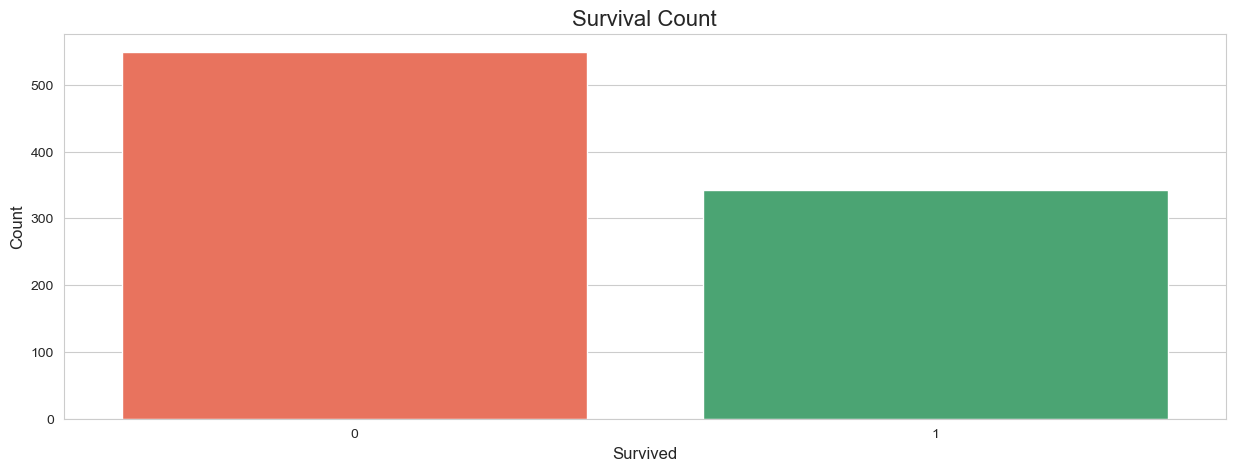

In [23]:
train_df['Survived'] = train_df['Survived'].astype(int)

plt.figure(figsize=(15, 5))
sns.countplot(x='Survived', data=train_df, hue='Survived',
              palette={0: 'tomato', 1: 'mediumseagreen'},
              legend=False)
plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 2. Passenger class distribution

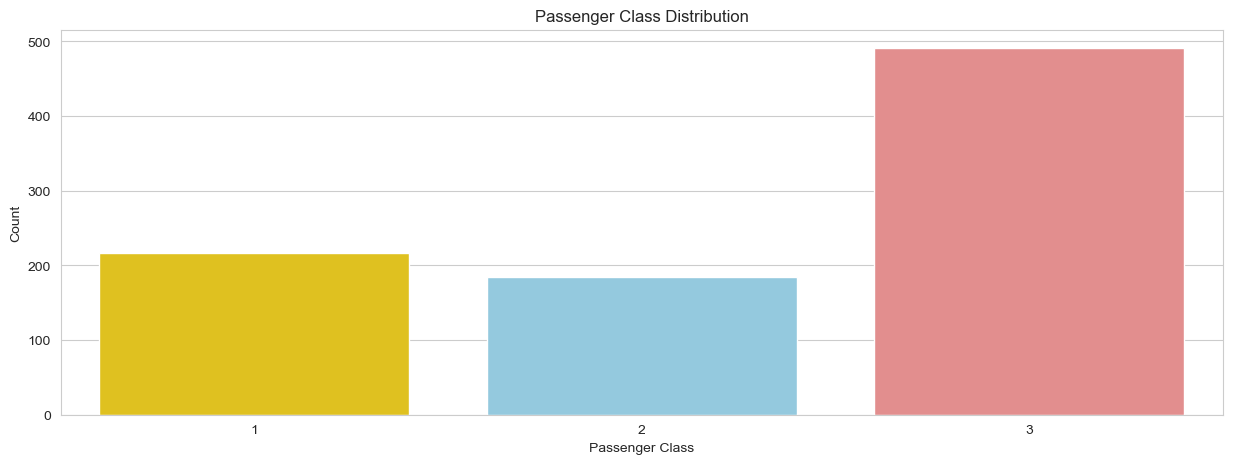

In [24]:
train_df['Pclass'] = train_df['Pclass'].astype(int)

plt.figure(figsize=(15, 5))
sns.countplot(
    x='Pclass',
    data=train_df,
    hue='Pclass',  # required for palette
    palette={1: 'gold', 2: 'skyblue', 3: 'lightcoral'},
    legend=False
)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# 3. Age distribution

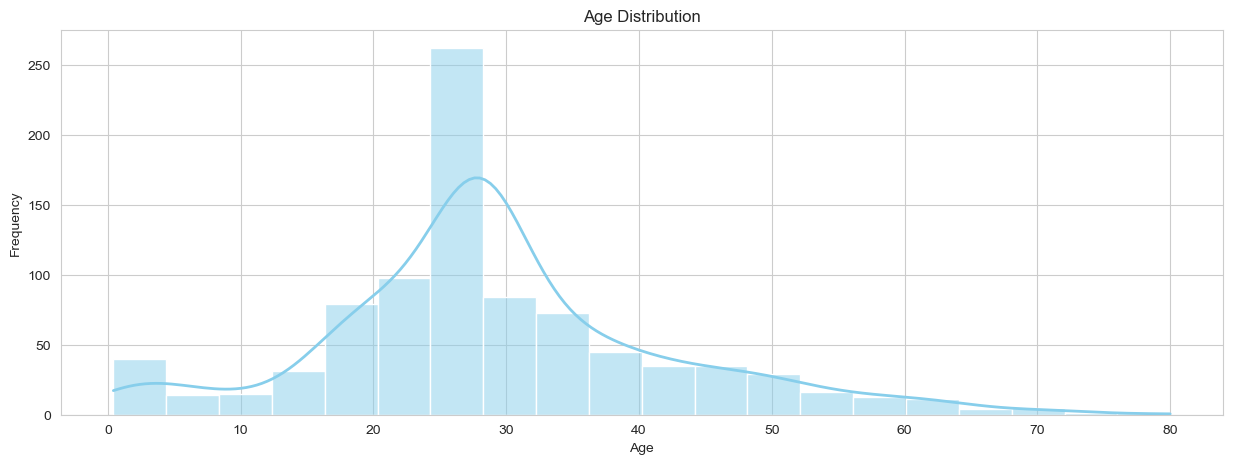

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(
    data=train_df,
    x='Age',
    bins=20,
    kde=True,
    color='skyblue', 
    line_kws={'color': 'darkblue', 'linewidth': 2} 
)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Gender distribution

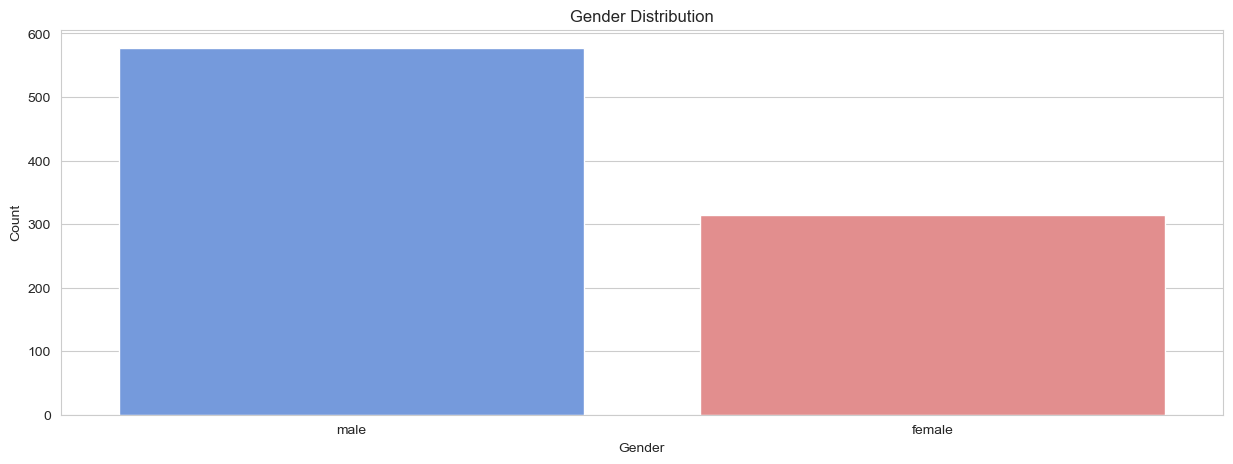

In [26]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Sex',
    data=train_df,
    hue='Sex', 
    palette={'male': 'cornflowerblue', 'female': 'lightcoral'},
    legend=False 
)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 5. Embarked port distribution

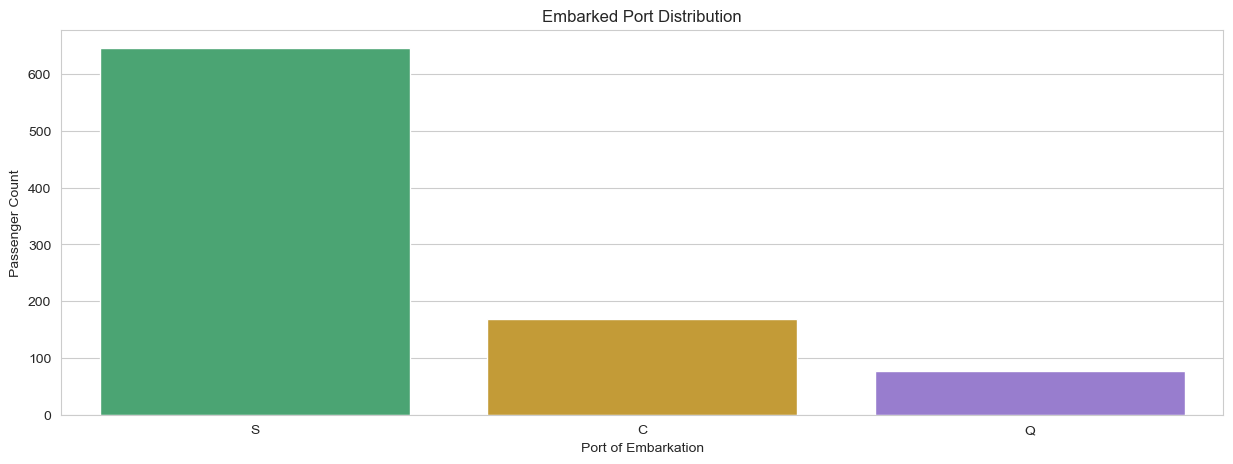

In [27]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Embarked',
    data=train_df,
    hue='Embarked',
    palette={'S': 'mediumseagreen', 'C': 'goldenrod', 'Q': 'mediumpurple'},
    legend=False 
)
plt.title('Embarked Port Distribution')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count')
plt.show()

# 6. Survival rate by passenger class

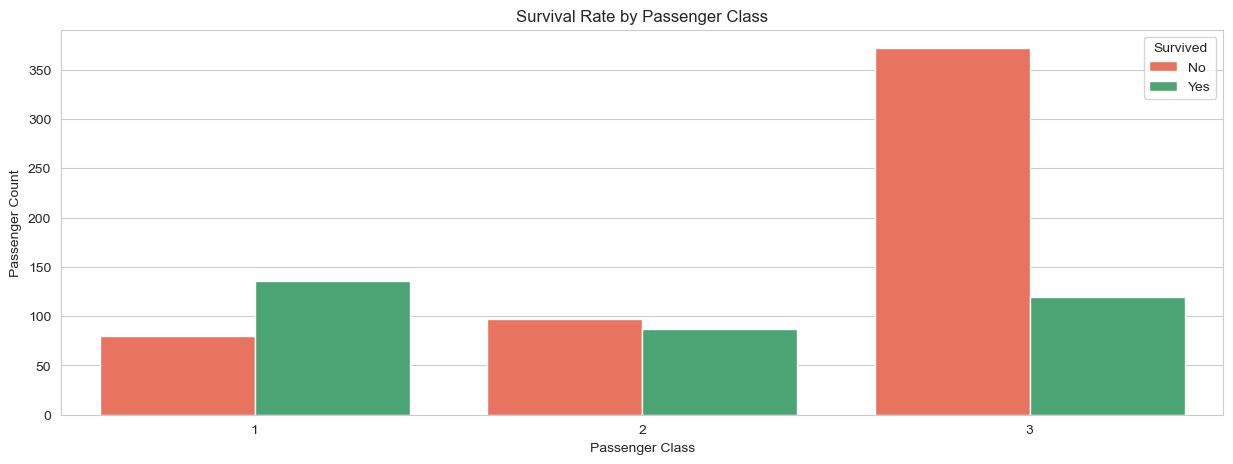

In [28]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Pclass',
    hue='Survived',
    data=train_df,
    palette={0: 'tomato', 1: 'mediumseagreen'}
)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 7. Survival rate by gender

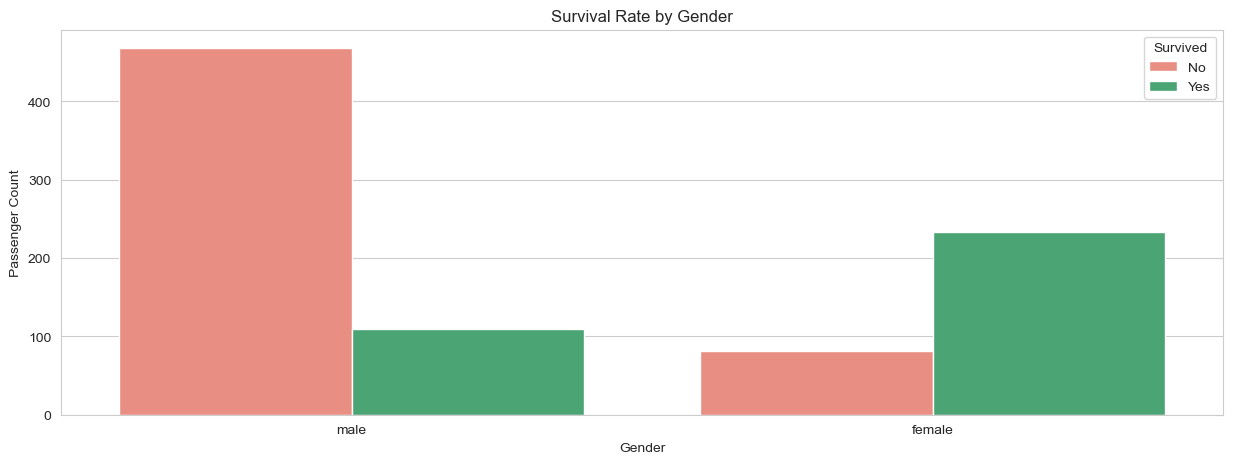

In [29]:
plt.figure(figsize=(15, 5))
sns.countplot(
    x='Sex',
    hue='Survived',
    data=train_df,
    palette={0: 'salmon', 1: 'mediumseagreen'}
)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes']) 
plt.show()

# 8. Survival rate by age

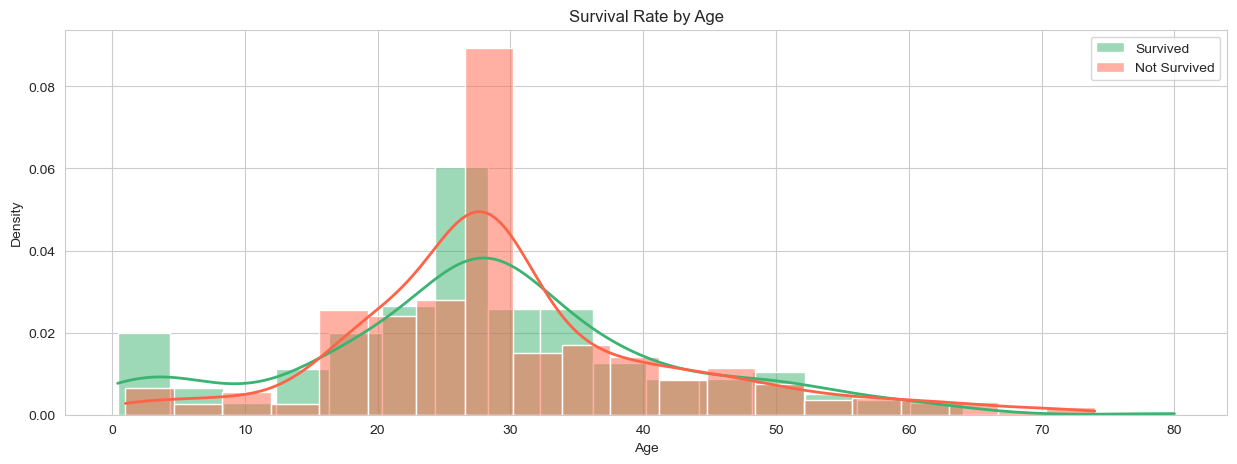

In [30]:
plt.figure(figsize=(15, 5))

sns.histplot(
    train_df[train_df['Survived'] == 1]['Age'],
    bins=20,
    kde=True,
    color='mediumseagreen',
    label='Survived',
    stat='density',  # Optional: aligns KDE & histogram
    line_kws={'linewidth': 2}
)

sns.histplot(
    train_df[train_df['Survived'] == 0]['Age'],
    bins=20,
    kde=True,
    color='tomato',
    label='Not Survived',
    stat='density',
    line_kws={'linewidth': 2}
)

plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Gowtham GS Patil

- 🌐 **GitHub**: [github.com/gowthamgspatil](https://github.com/gowthamgspatil)  
- 💼 **LinkedIn**: [linkedin.com/in/gowthamgshivamuthy](https://www.linkedin.com/in/gowthamgshivamuthy)
